In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 999999)

plt.style.use('ggplot')

In [2]:
import pandas as pd
train = pd.read_csv('data/train.csv', index_col=0)
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [3]:
## 상자그림
from sklearn.datasets import load_iris # iris 데이터 제공 라이브러리
 
iris = load_iris()
 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
iris_df.columns = ['sepal_length','sepal_width','petal_length', 'petal_width','target']

iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df = iris_df.reset_index().rename(columns = {'index':'ID'})
iris_df.ID = iris_df.ID+100
iris_df.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,target
0,100,5.1,3.5,1.4,0.2,setosa
1,101,4.9,3.0,1.4,0.2,setosa
2,102,4.7,3.2,1.3,0.2,setosa
3,103,4.6,3.1,1.5,0.2,setosa
4,104,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.columns

Index(['ID', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'target'],
      dtype='object')

---

## histogram 그리기
- 히스토그램의 내장 버전에는 bin과 alhpa 옵션이 존재한다.

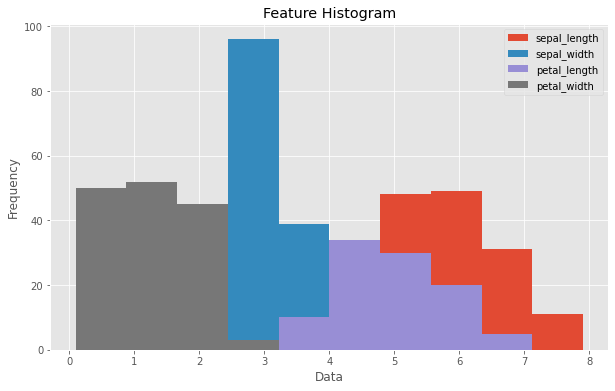

In [6]:
## 모든 연속형 변수 그리기
    # ID 변수 제외 히스토그램 그리기
none_id = iris_df.drop('ID', axis=1)
none_id.plot.hist(rot=0, figsize=(10,6))

# 타이틀 지정
plt.title("Feature Histogram")
plt.xlabel("Data")
plt.show()

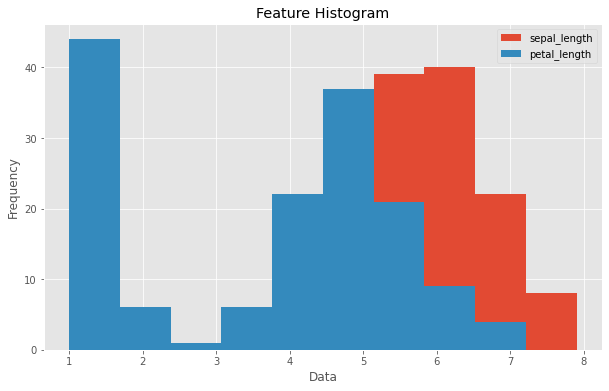

In [7]:
## 원하는 변수만 히스토그램 그리기
    # grid = True 를 통해 격차 출력 (ggplot 테마이기에 격자가 원래부터 출력됨)
iris_df[['sepal_length','petal_length']].plot.hist(rot=0, figsize=(10,6), grid=True)

# 타이틀 지정
plt.title("Feature Histogram")
plt.xlabel("Data")
plt.show()

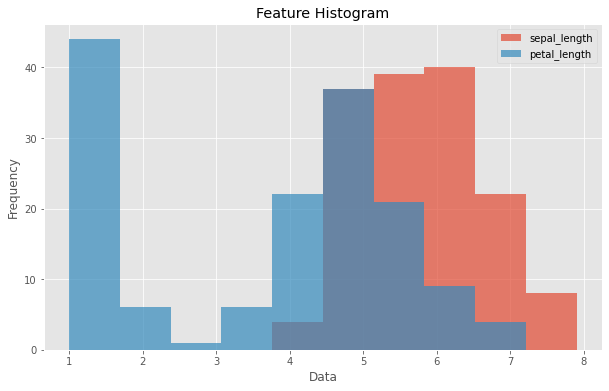

In [8]:
## 원하는 변수만 히스토그램 그리기
    # 두 개의 변수를 그릴 때 투명도를 조절하여 그래프 그리기
iris_df[['sepal_length','petal_length']].plot.hist(alpha=0.7, figsize=(10,6))

# 타이틀 지정
plt.title("Feature Histogram")
plt.xlabel("Data")
plt.show()

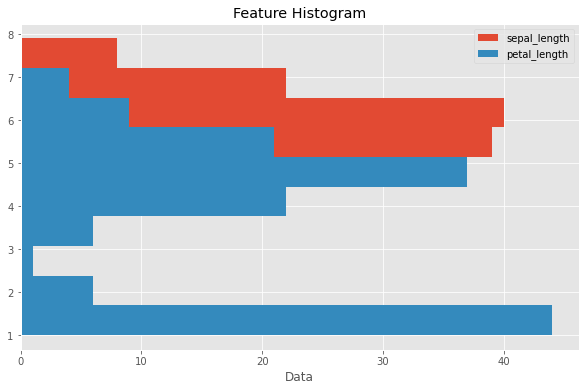

In [9]:
## y축이 기준이 되도록 그리기
iris_df[['sepal_length','petal_length']].plot.hist(orientation='horizontal', figsize=(10,6))

# 타이틀 지정
plt.title("Feature Histogram")
plt.xlabel("Data")
plt.show()

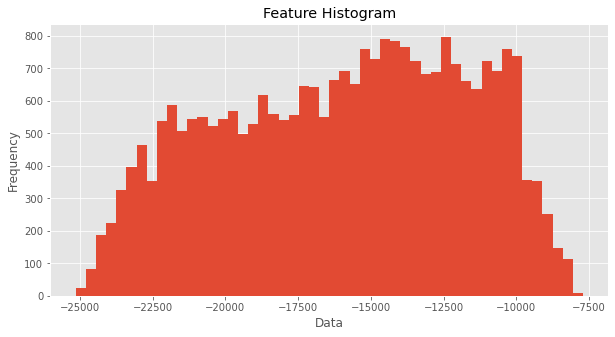

In [10]:
## 구간을 설정하기: 히스토그램 bins 설정
    # range(n,m,k)를 사용해서 원하는 구간과 수를 정할 수 있음
train['DAYS_BIRTH'].plot.hist(bins=50, figsize=(10,5))

# 타이틀 지정
plt.title("Feature Histogram")
plt.xlabel("Data")
plt.show()

----------------------

## Kernel Density Plot 그리기
- Kernel Density Plot의 내장 버전에는 hue 옵션이 존재하지 않는다.
- bw_method만 존재하며 밀도 그래프의 대역폭 값을 정할 수 있다.

*연속형 변수들을 범주별로 kde를 그리려면 seaborn을 사용하거나 데이터 프레임 객체를 나눈후 .plot 적용*

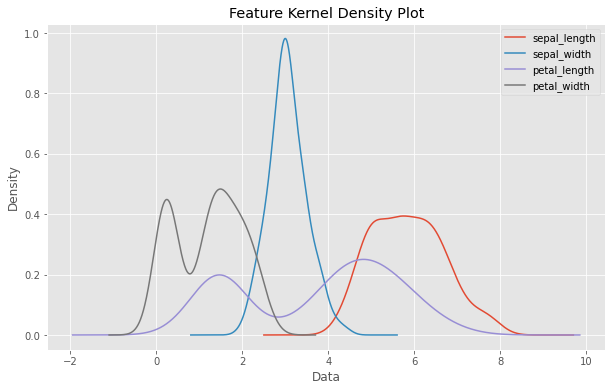

In [29]:
## 밀도 그래프 그리기
none_id.plot.kde(figsize=(10,6))

# 타이틀 지정
plt.title("Feature Kernel Density Plot")
plt.xlabel("Data")
plt.show()

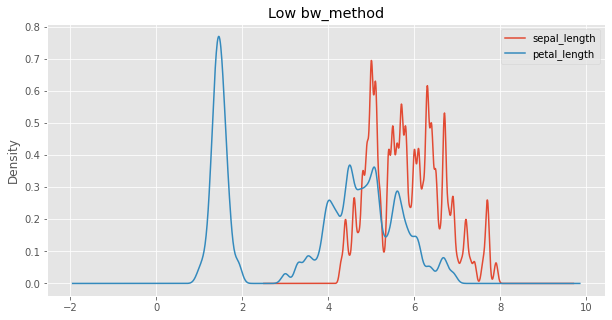

Text(0.5, 1.0, 'Large bw_method')

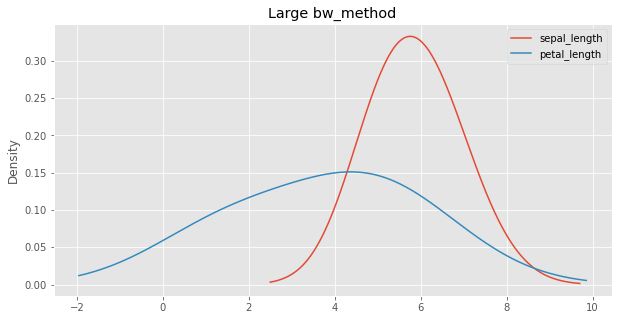

In [26]:
## 밀도 그래프 그리기
    # bw_method를 너무 작게 하면 과적합이 발생함
iris_df[['sepal_length','petal_length']].plot.kde(bw_method = 0.05, figsize=(10,5))
plt.title("Low bw_method")
plt.show()

    # bw_method를 크게 하면 과소적합이 발생함
iris_df[['sepal_length','petal_length']].plot.kde(bw_method = 1, figsize=(10,5))
plt.title("Large bw_method")

-----------

## pie 차트 그리기
- autopct를 통해 %로 나타내기
- startangle로 pie chart 회전
- colors를 사용해 조각별 색 조정
- textprops으로 글씨 크기 조정

In [65]:
group_df = train.groupby('edu_type')['income_total'].mean()
pd.DataFrame(group_df)

,income_total
edu_type,
Academic degree,241630.434783
Higher education,224088.974309
Incomplete higher,203263.676471
Lower secondary,144404.474708
Secondary / secondary special,172305.923006


<AxesSubplot:ylabel='income_total'>

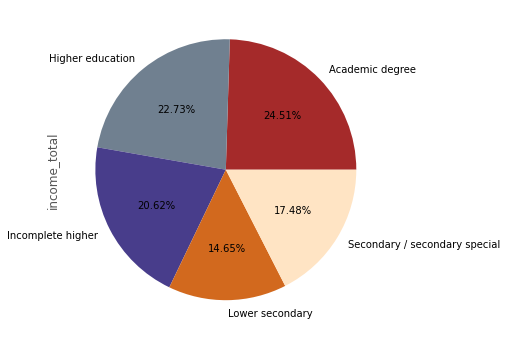

In [68]:
## pie chart를 사용하려면 인덱스가 카테고리와 같이 나타나고,
## 열이 각 인덱스에 대응하는 수치로 나와있어야 한다.

    # 퍼센트와 색 조정
group_df.plot.pie(autopct = '%.2f%%', 
                  figsize = (6,6),
                  colors = ['brown','slategrey','darkslateblue','chocolate','bisque'])

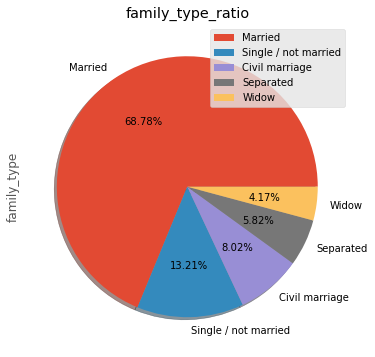

In [71]:
## value_counts()를 pie plot으로 보기
    # shadow=True를 사용하여 그림자 추가
train.family_type.value_counts().plot.pie(autopct = '%.2f%%',
                                          figsize = (6,6),
                                          shadow=True)
# 제목 설정
plt.title('family_type_ratio')
# 범례 표시 
plt.legend(train.family_type.value_counts().index, loc='best')
plt.show()

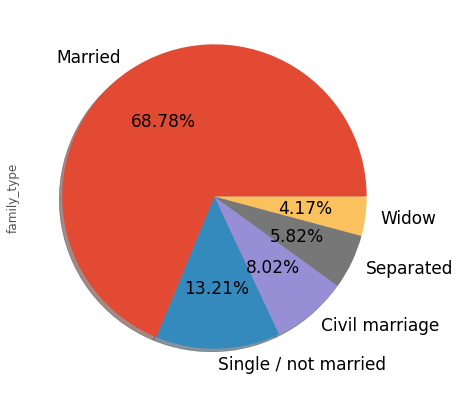

In [77]:
## kind로 pie chart 그리기
    # textprops를 사용해 글씨 크기 조정
train.family_type.value_counts().plot(kind='pie',
                                      autopct = '%.2f%%',
                                      figsize = (7,7),
                                      shadow=True,
                                      textprops={'size':17})
plt.show()